# Global Power Plant Database - Evaluation Project

# Problem Statement:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

# Prediction

# Loading required Libraries

In [3]:
import numpy as np
import pandas as pd
import io
import requests

import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

# Loading The Data

In [4]:
df=pd.read_csv(r"C:\Users\Asus\Desktop\dataset\Global_powerplant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA (Exploratory Data Analysis)

In [5]:
#checking the first 5 data
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
#checking number of rows and columns
df.shape

(907, 27)

There are 907 rows and 27 columns in the datasets.

In [8]:
#checking the no of colums present 
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

There are 27 columns in the datasets

In [10]:
#finding the data types
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are 12 object type and remaining 13 columns float types in the datasets.

In [11]:
#checking for null values

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [12]:
#dropping columns 
df = df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1)

Have dropped all the column that had more than 50% of missing data since it made no sense to treat such a huge chunk of missing value and ultimately make our model biased towards those missing value treated data.

In [13]:
#checking no of rows and columns 
df.shape

(907, 15)

Now our column numbers have been reduced to 13 from the initial value of 25.

In [15]:
df.nunique().to_frame("Unique Values") #checking nan values

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


In [16]:
#using drop function to drop columns

df = df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1)

We have successfully dropped 6 more columns that were not providing any useful insight for our predition models.

In [17]:
print(df.shape)
df.head() #checkig the first 5 data

(907, 9)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


Now our new dataset has 908 rows and 7 columns after we got rid of all the useless columns post analysis from it's original number of 25.

In [18]:
#checking null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

Okay so we still have missing values present in our dataset columns that will need to be treated now. But before that we will separate our categorical columns and numerical columns so that application of meand and mode will become easier.

In [19]:
#checking the information of the data present 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2018  448 non-null    float64
 8   generation_gwh_2019  0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 63.9+ KB


Using the info method we can see that out of the 7 columns present in our filtered dataset we have 4 numerical data valued columns and 3 object data valued columns.

In [20]:
#using describe

df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,35136.000000,NaN


In [21]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2018', 'generation_gwh_2019']


e have successfully bifurcated the object datatype column names and float data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process only on numerical continous columns.

In [22]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.

In [23]:
#checking null values

df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

still there are some columns to be corercted.

In [24]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64
geolocation_source
WRI                            

In the above cell I am taking a look at the object data type columns so as to check how many categories each of them hold and how many values/rows are populated with that data.

# Visualization of the dataset

In [25]:
#checking columns
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

Listing down the names of all the columns present in our filtered dataframe. We will analyze each one of them with the help of some visual plots.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


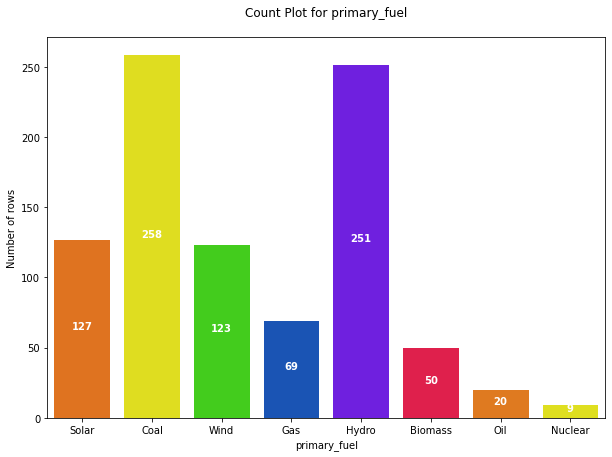

In [26]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


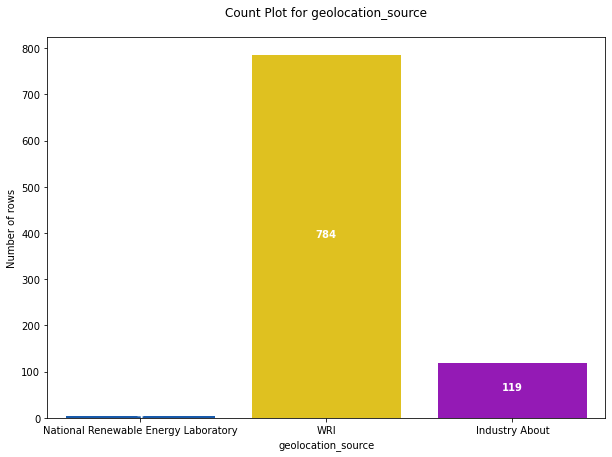

In [27]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


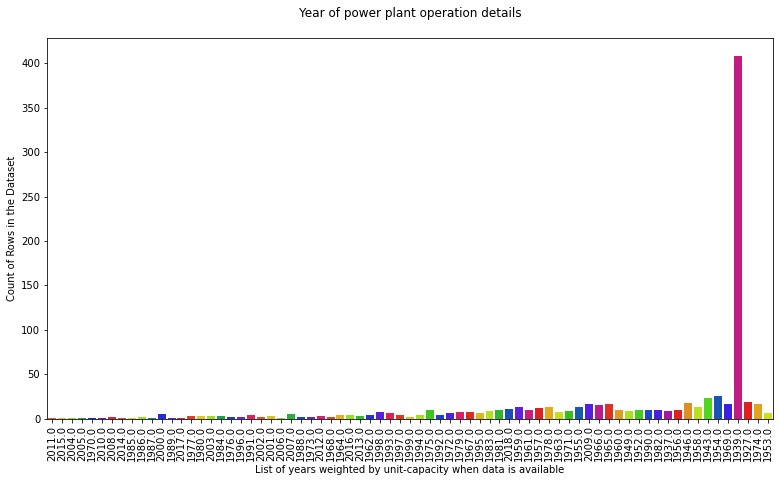

In [28]:
plt.figure(figsize=(13,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.

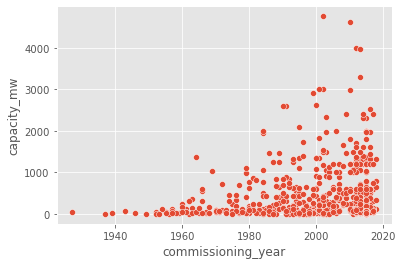

In [29]:
#using scattertplot
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

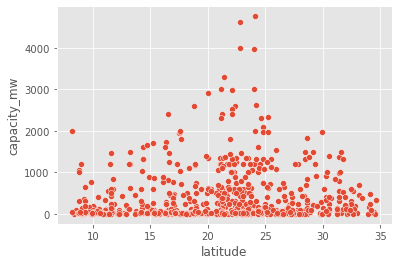

In [30]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

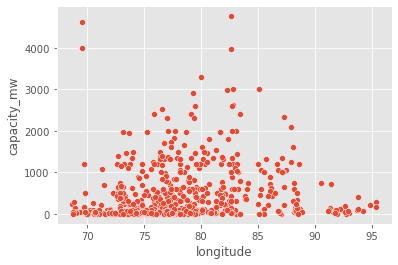

In [31]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

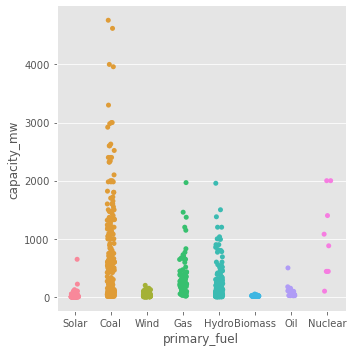

In [32]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

In the above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

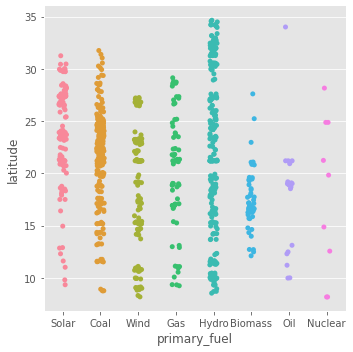

In [33]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

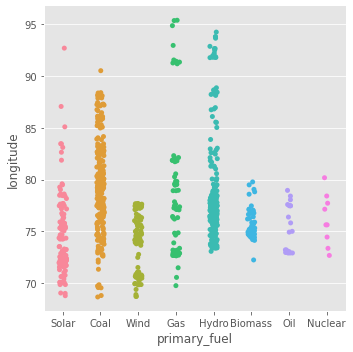

In [34]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

In the above categorical plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.

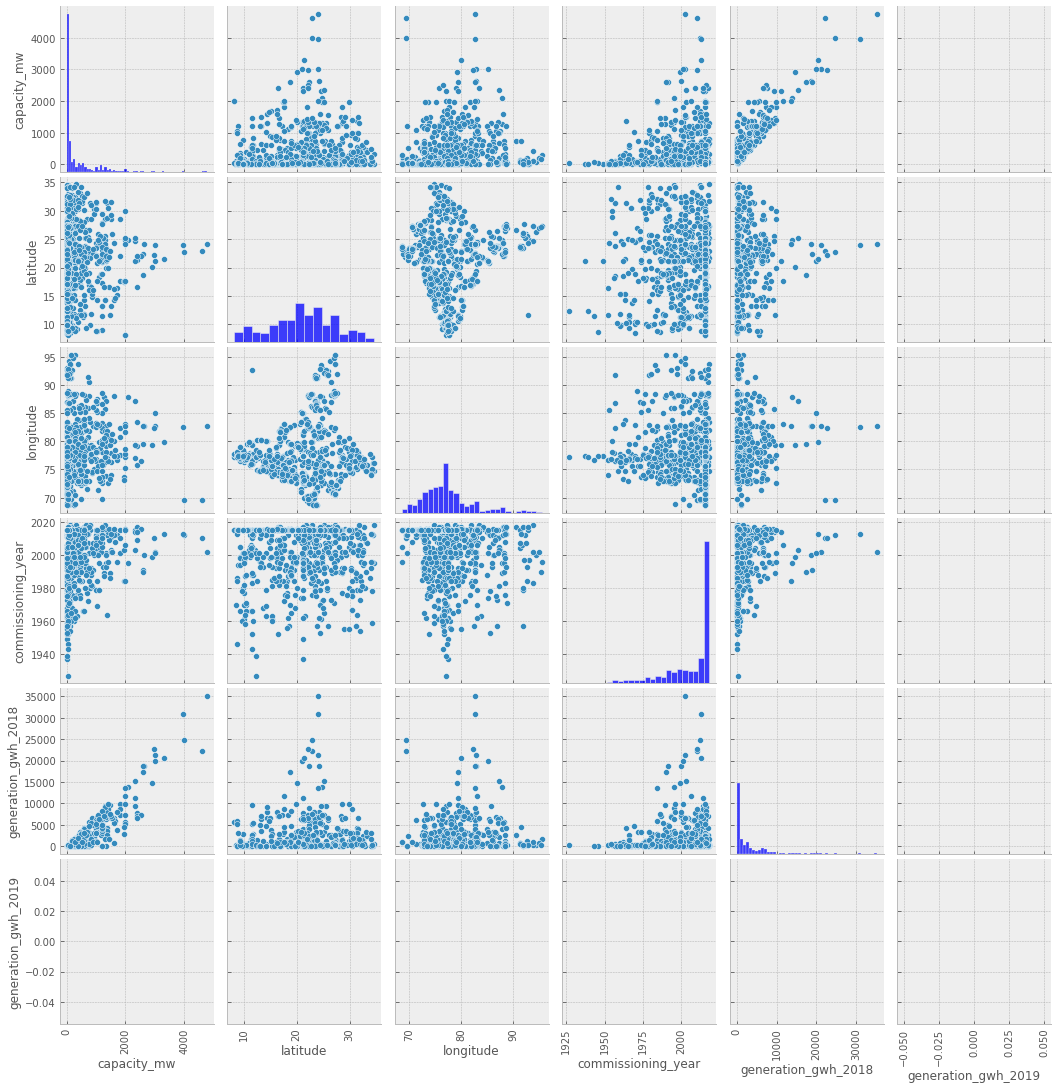

In [41]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From the above pair plot we can see the data distribution amongst the numerical data type columns.

# Encoding all the object datatype columns

In [42]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.

In [44]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0,7279.000000,NaN


I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype. I could have used one hot encoding but considering that "source" column has lots of unique values the number of columns would have increased a lot so I felt ordinal encoding was a better option here.

# Correlation using a Heatmap

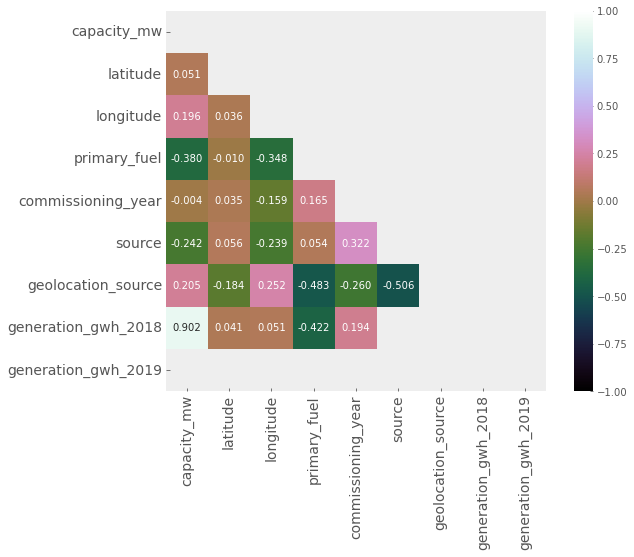

In [45]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

n the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Correlation Bar Plot comparing features with our labels

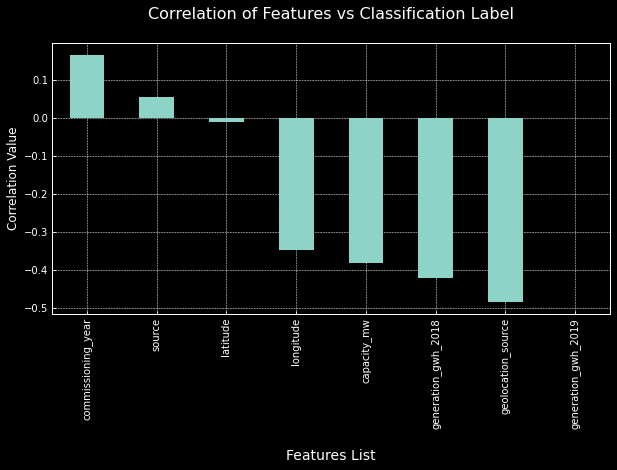

In [46]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

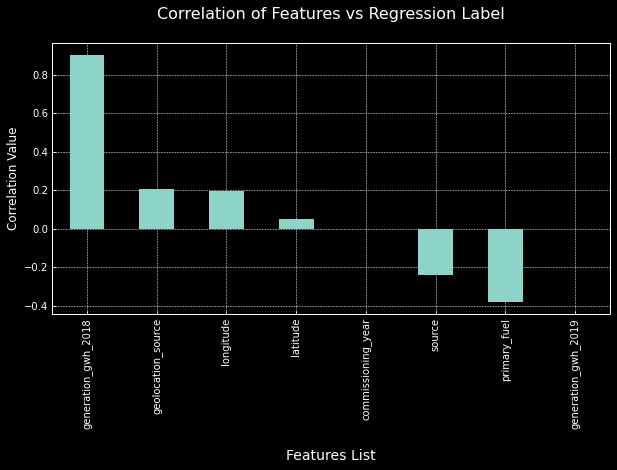

In [47]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

# Using Z Score to remove outliers

In [48]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (907, 9)
Shape of the dataframe after removing outliers:  (0, 9)
Percentage of data loss post outlier removal:  100.0


I have used the Z score method to remove the outliers since the IQR method was making me lose way more than 10 percent of data which I could not have afforded to lose.

In [49]:
df.skew()

capacity_mw           NaN
latitude              NaN
longitude             NaN
primary_fuel          NaN
commissioning_year    NaN
source                NaN
geolocation_source    NaN
generation_gwh_2018   NaN
generation_gwh_2019   NaN
dtype: float64

# Using Log Transform to fix skewness

In [50]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [51]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.

# Resolving the class imbalance issue in our label column

In [52]:
Y.value_counts()

Series([], Name: primary_fuel, dtype: int64)

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category.

# Machine Learning Model for Classification with Evaluation Metrics

In [58]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.